<a href="https://colab.research.google.com/github/SasikalaThennarasu/GUVI-CAPSTONE-PROJECTS/blob/main/EMPLOYEE_ATTRITION_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv(r"general_data.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
data.shape

(4410, 24)

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Exploratory Data Analysis

Total Working Years and NumCompaniesWorked have null values

<Axes: ylabel='Frequency'>

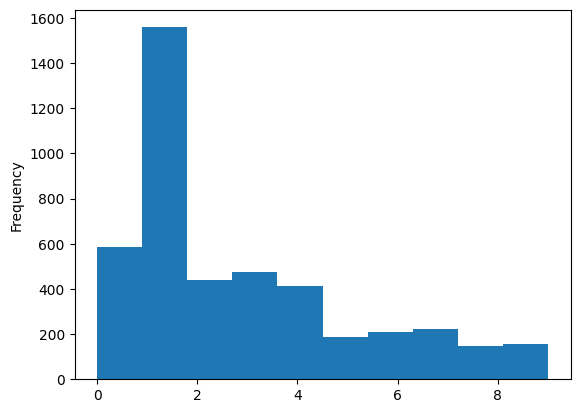

In [ ]:
data["NumCompaniesWorked"].plot(kind="hist")

<Axes: ylabel='Frequency'>

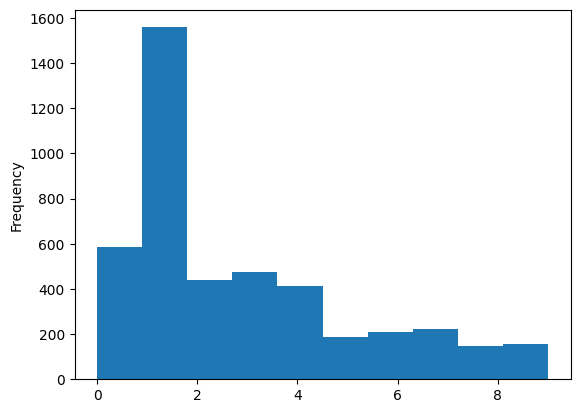

In [ ]:
data["Mode"]=data["NumCompaniesWorked"].fillna(data["NumCompaniesWorked"].mode([0]))
data["Mode"].plot(kind="hist")

In [ ]:
data["NumCompaniesWorked"]=data["NumCompaniesWorked"].fillna(data["NumCompaniesWorked"].mode()[0])

In [ ]:
data["TotalWorkingYears"].corr(data["YearsAtCompany"])

0.6277031466021693

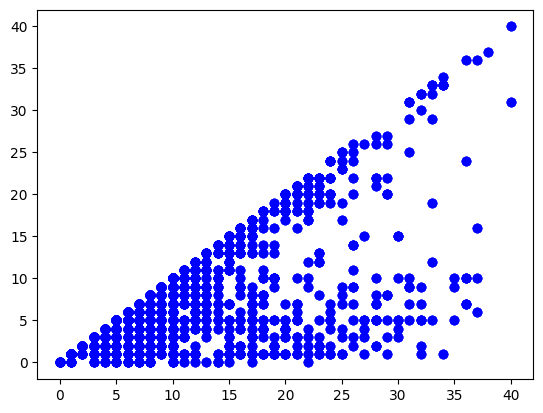

In [ ]:
plt.scatter(data["TotalWorkingYears"],data["YearsAtCompany"] , label='Data Points', color='b', marker='o')

In [ ]:
#since years at company and total working years are correlated,imputing by grouped mean
data["TotalWorkingYears"]=data.groupby("YearsAtCompany")["TotalWorkingYears"].transform(lambda x:x.fillna(x.mean()))

In [ ]:
data=data.drop(columns=["Mode"])

In [ ]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
manager=pd.read_csv(r"manager_survey_data.csv")

In [ ]:
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
manager.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

<h5>we have no null values in magager data</h5>

In [ ]:
employee=pd.read_csv(r"employee_survey_data.csv")

In [ ]:
employee.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
employee.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

<Axes: ylabel='Frequency'>

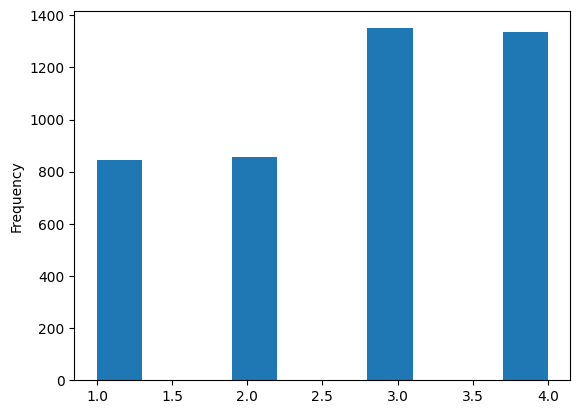

In [ ]:
#EnvironmentSatisfaction
employee["EnvironmentSatisfaction"].plot(kind="hist")

<Axes: ylabel='Frequency'>

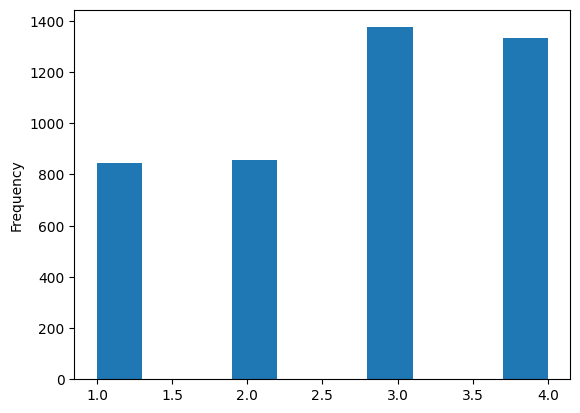

In [ ]:
Emedian=employee["EnvironmentSatisfaction"].fillna(employee["EnvironmentSatisfaction"].median())
Emedian.plot(kind="hist")

In [ ]:
employee["EnvironmentSatisfaction"]=employee["EnvironmentSatisfaction"].fillna(employee["EnvironmentSatisfaction"].median())

<Axes: ylabel='Frequency'>

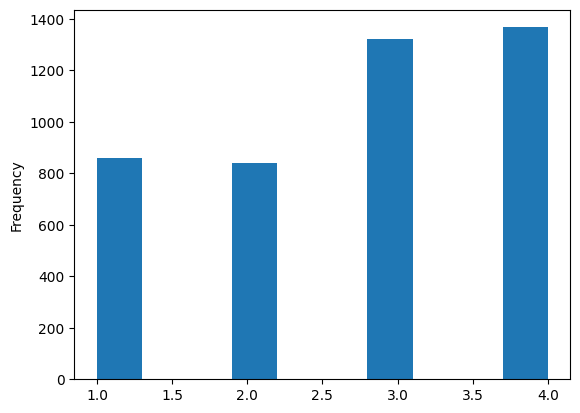

In [ ]:
#JobSatisfaction
employee["JobSatisfaction"].plot(kind="hist")

<Axes: ylabel='Frequency'>

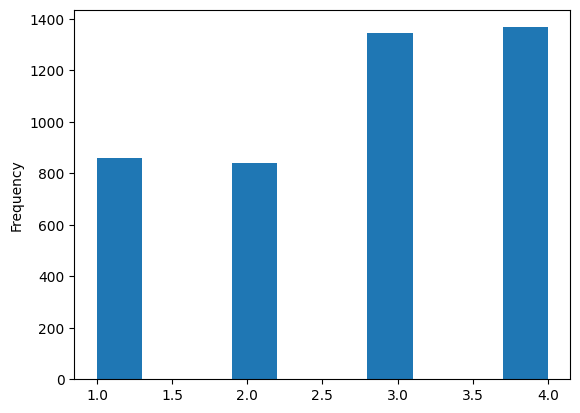

In [ ]:
jmedian=employee["JobSatisfaction"].fillna(employee["JobSatisfaction"].median())
jmedian.plot(kind="hist")

In [ ]:
employee["JobSatisfaction"]=employee["JobSatisfaction"].fillna(employee["JobSatisfaction"].median())

<Axes: ylabel='Frequency'>

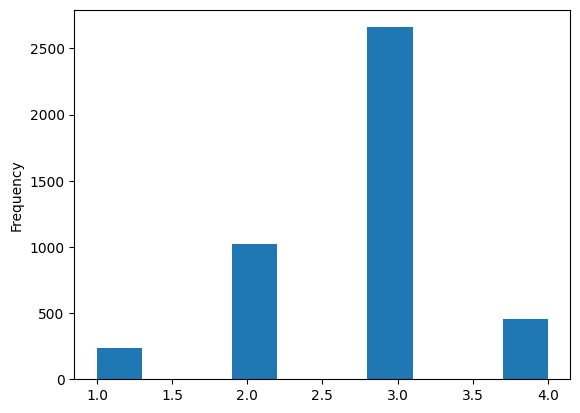

In [ ]:
#worklifebalance
employee["WorkLifeBalance"].plot(kind="hist")

<Axes: ylabel='Frequency'>

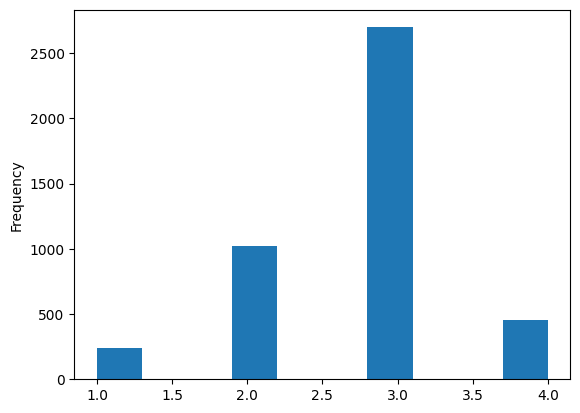

In [ ]:
wmedian=employee["WorkLifeBalance"].fillna(employee["WorkLifeBalance"].median())
wmedian.plot(kind="hist")

In [ ]:
employee["WorkLifeBalance"]=employee["WorkLifeBalance"].fillna(employee["WorkLifeBalance"].median())

In [ ]:
employee.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [ ]:
merged_df = pd.merge(manager, employee, on='EmployeeID', how='inner')

In [ ]:
merged_df.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [ ]:
merged_df["TotalSatisfaction"]=(merged_df['EnvironmentSatisfaction'] +
                            merged_df['JobInvolvement'] +
                            merged_df['JobSatisfaction'] +
                            merged_df['PerformanceRating'] +
                            merged_df['WorkLifeBalance']) /5

In [ ]:
new_df =merged_df

In [ ]:
new_df = new_df.drop(columns=["JobInvolvement","PerformanceRating","EnvironmentSatisfaction","JobSatisfaction","WorkLifeBalance"])

In [ ]:
final = pd.merge(data,new_df , on='EmployeeID', how='inner')

In [ ]:
final.to_csv('final1.csv')

In [ ]:
out_time = pd.read_csv("out_time.csv")

In [ ]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [ ]:
in_time = pd.read_csv("in_time.csv")

In [ ]:
in_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
out_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

In [ ]:
drop_col = list(out_time.select_dtypes(include='float').columns)#Null values are in float datatypes here holidays columns
drop_col.append('EmployeeID')
columns_list = list(in_time.drop(columns=drop_col).columns)

In [ ]:
columns_list

['2015-01-02',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-12',
 '2015-01-13',
 '2015-01-15',
 '2015-01-16',
 '2015-01-19',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-16',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-06',
 '2015-03-09',
 '2015-03-10',
 '2015-03-11',
 '2015-03-12',
 '2015-03-13',
 '2015-03-16',
 '2015-03-17',
 '2015-03-18',
 '2015-03-19',
 '2015-03-20',
 '2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-26',
 '2015-03-27',
 '2015-03-30',
 '2015-03-31',
 '2015-04-01',
 '2015-04-02',
 '2015-04-03',
 '2015-04-06',
 '2015-04-07',
 '2015-04-08',
 '2015-04-

In [ ]:
def avg_working_time(df_in,df_out,columns_list):

    #Create a list to store each calculated column
    calculated_columns = []
    for i in columns_list:
        in_date = pd.to_datetime(df_in[i])
        out_date = pd.to_datetime(df_out[i])

        #Calculate the time difference and store it in the list
        calculated_columns.append(out_date - in_date)

    # Concatenate the list of columns to the result_df
    result_df = pd.concat(calculated_columns, axis=1, keys=columns_list)
    result_df['Avg_Working_time']=result_df[columns_list].mean(axis=1)
    return result_df['Avg_Working_time']

In [ ]:
final=pd.read_csv(r"final1.csv")

In [ ]:
final['Avg_Working_time'] = avg_working_time(in_time, out_time, columns_list)

In [ ]:
final

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,Avg_Working_time
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,11,8,0,1.000000,6,1,0,0,3.0,0 days 07:22:25.142241379
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,23,8,1,6.000000,3,5,1,4,3.0,0 days 07:43:08.288135593
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,15,8,3,5.000000,2,5,0,3,2.2,0 days 07:00:47.665289256
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,11,8,3,13.000000,5,8,7,5,3.2,0 days 07:11:37.242553191
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,12,8,2,9.000000,2,6,0,4,2.8,0 days 08:00:22.228571428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,...,17,8,1,10.000000,5,3,0,2,2.8,0 days 08:31:20.197530864
4406,4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,...,15,8,0,10.000000,2,3,0,2,3.2,0 days 06:05:34.634854771
4407,4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,...,20,8,0,5.000000,4,4,1,2,2.8,0 days 07:42:23.874458874
4408,4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,...,14,8,1,10.000000,2,9,7,8,2.6,0 days 09:29:33.340248962


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               4410 non-null   int64          
 1   Age                      4410 non-null   int64          
 2   Attrition                4410 non-null   object         
 3   BusinessTravel           4410 non-null   object         
 4   Department               4410 non-null   object         
 5   DistanceFromHome         4410 non-null   int64          
 6   Education                4410 non-null   int64          
 7   EducationField           4410 non-null   object         
 8   EmployeeCount            4410 non-null   int64          
 9   EmployeeID               4410 non-null   int64          
 10  Gender                   4410 non-null   object         
 11  JobLevel                 4410 non-null   int64          
 12  JobRole             

In [ ]:
final["Avg_Working_time"]

0      0 days 07:22:25.142241379
1      0 days 07:43:08.288135593
2      0 days 07:00:47.665289256
3      0 days 07:11:37.242553191
4      0 days 08:00:22.228571428
                  ...           
4405   0 days 08:31:20.197530864
4406   0 days 06:05:34.634854771
4407   0 days 07:42:23.874458874
4408   0 days 09:29:33.340248962
4409   0 days 06:59:20.211206896
Name: Avg_Working_time, Length: 4410, dtype: timedelta64[ns]

In [ ]:
# Convert timedelta to float representation in hours
final['Avg_Working_time'] = final['Avg_Working_time'].dt.total_seconds() / 3600.0


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   EmployeeID               4410 non-null   int64  
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome           

In [ ]:
final.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,Avg_Working_time
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,11,8,0,1.0,6,1,0,0,3.0,7.373651
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,23,8,1,6.0,3,5,1,4,3.0,7.718969
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,15,8,3,5.0,2,5,0,3,2.2,7.013240
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,11,8,3,13.0,5,8,7,5,3.2,7.193678
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,12,8,2,9.0,2,6,0,4,2.8,8.006175


In [ ]:
final.to_csv("final2.csv")

<h3>Final Dataframe</h3>

In [ ]:
final=pd.read_csv(r"final2.csv")

In [ ]:
final.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [ ]:
final.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,Avg_Working_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,3.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,3.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,15,8,3,5.0,2,5,0,3,2.2,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,11,8,3,13.0,5,8,7,5,3.2,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,12,8,2,9.0,2,6,0,4,2.8,8.006175


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

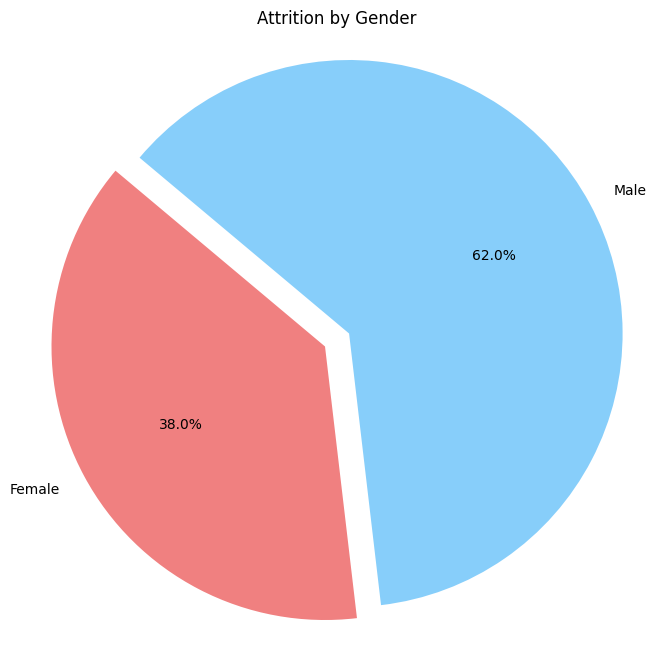

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Gender' and 'Attrition' and count the number of employees in each category
gender_attrition_counts = final.groupby(['Gender', 'Attrition']).size().unstack()

# Plot a pie chart
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightskyblue']
labels = gender_attrition_counts.index
explode = (0.1, 0)

plt.pie(gender_attrition_counts['Yes'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Attrition by Gender')
plt.axis('equal')

plt.show()

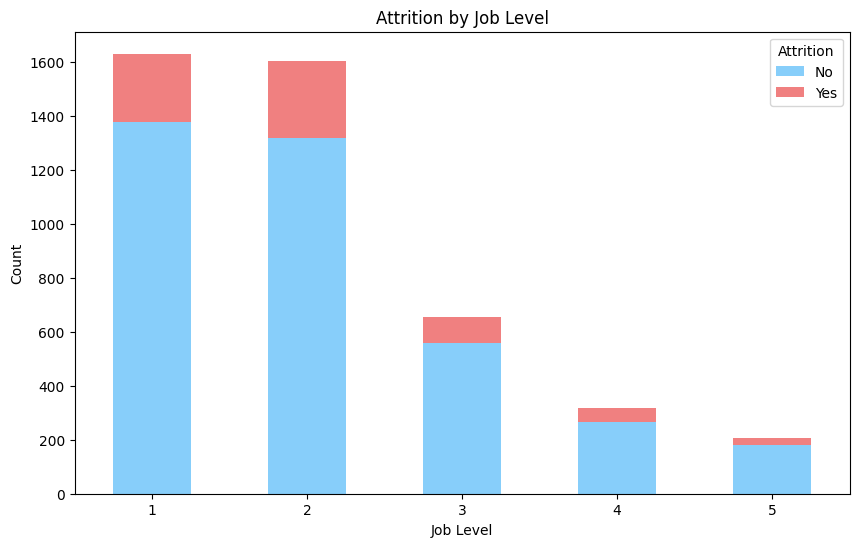

In [ ]:
# Group the data by 'JobLevel' and 'Attrition' and count the number of employees in each category
joblevel_attrition_counts = final.groupby(['JobLevel', 'Attrition']).size().unstack()

# Plot a bar chart
ax = joblevel_attrition_counts.plot(kind='bar', stacked=True, color=['lightskyblue', 'lightcoral'], figsize=(10, 6))
plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal

# Add a legend
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])

plt.show()

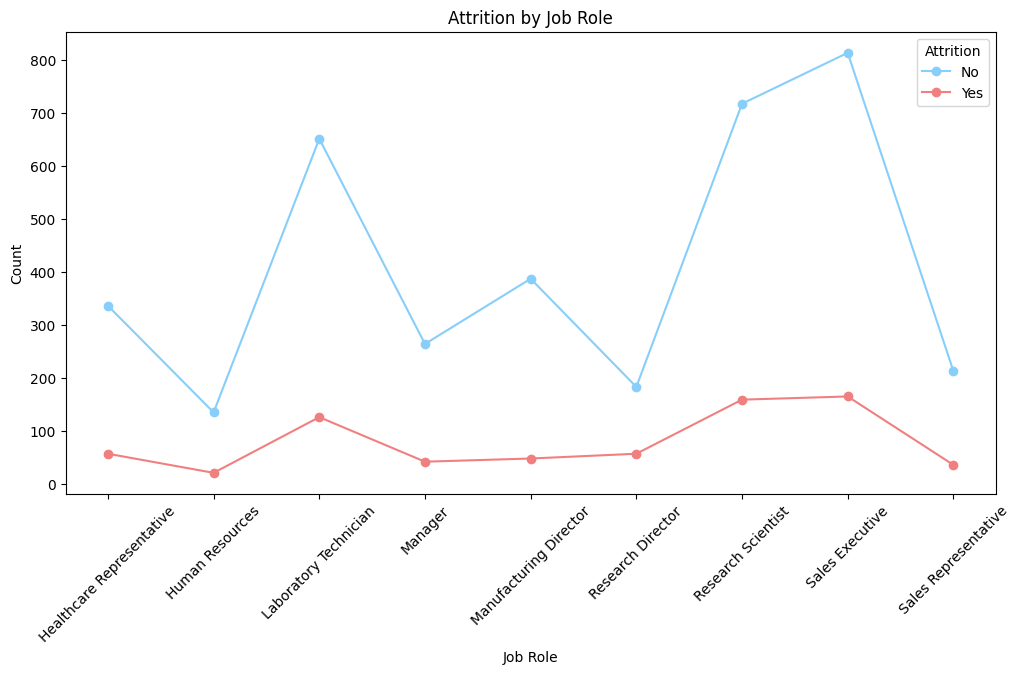

In [ ]:
# Group the data by 'JobRole' and 'Attrition' and count the number of employees in each category
jobrole_attrition_counts = final.groupby(['JobRole', 'Attrition']).size().unstack()

# Plot a line chart
ax = jobrole_attrition_counts.plot(kind='line', marker='o', linestyle='-', color=['lightskyblue', 'lightcoral'], figsize=(12, 6))
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])

plt.show()


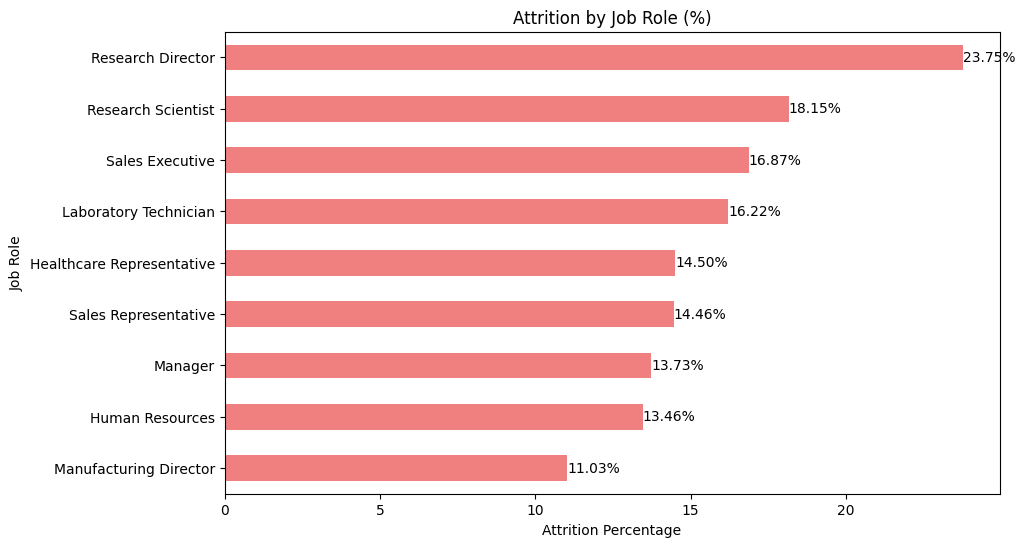

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'JobRole' and 'Attrition' and count the number of employees in each category
jobrole_attrition_counts = final.groupby(['JobRole', 'Attrition']).size().unstack()

# Calculate the percentage of Attrition for each JobRole
jobrole_attrition_percentages = (jobrole_attrition_counts['Yes'] / jobrole_attrition_counts.sum(axis=1)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
jobrole_attrition_percentages.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Attrition by Job Role (%)')
plt.xlabel('Attrition Percentage')
plt.ylabel('Job Role')

# Add percentage labels to the bars
for index, value in enumerate(jobrole_attrition_percentages.sort_values(ascending=True)):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()


In [ ]:
import plotly.express as px
# Group the data by 'MaritalStatus' and 'Attrition' and count the number of employees in each category
marital_attrition_counts = final.groupby(['MaritalStatus', 'Attrition']).size().unstack()
# Create a new DataFrame with the hierarchical structure needed for the Sunburst chart
data = pd.DataFrame(columns=["MaritalStatus", "Attrition", "Count"])
for marital_status in marital_attrition_counts.index:
    data = data.append({"MaritalStatus": marital_status, "Attrition": "No", "Count": marital_attrition_counts.loc[marital_status, "No"]}, ignore_index=True)
    data = data.append({"MaritalStatus": marital_status, "Attrition": "Yes", "Count": marital_attrition_counts.loc[marital_status, "Yes"]}, ignore_index=True)

fig = px.sunburst(data, path=['MaritalStatus', 'Attrition'], values='Count')
fig.update_layout(title='Attrition by Marital Status Sunburst Chart')
fig.show()


<ipython-input-101-7e7ce80c03c4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"MaritalStatus": marital_status, "Attrition": "No", "Count": marital_attrition_counts.loc[marital_status, "No"]}, ignore_index=True)
<ipython-input-101-7e7ce80c03c4>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"MaritalStatus": marital_status, "Attrition": "Yes", "Count": marital_attrition_counts.loc[marital_status, "Yes"]}, ignore_index=True)
<ipython-input-101-7e7ce80c03c4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"MaritalStatus": marital_status, "Attrition": "No", "Count": marital_attrition_counts.loc[marital_status, "No"]}, ignore_index=True)
<ipython-input-101-7e7ce80

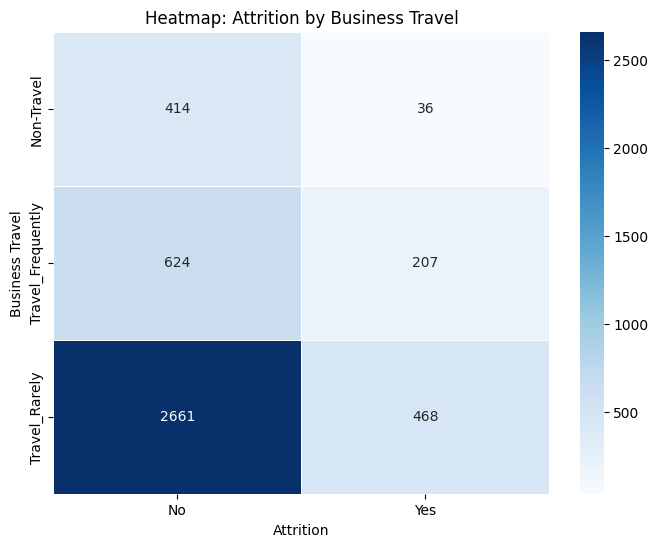

In [ ]:
# Create a pivot table to count the number of employees in each category
pivot_table = final.pivot_table(index='BusinessTravel', columns='Attrition', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)

plt.title('Heatmap: Attrition by Business Travel')
plt.xlabel('Attrition')
plt.ylabel('Business Travel')

plt.show()

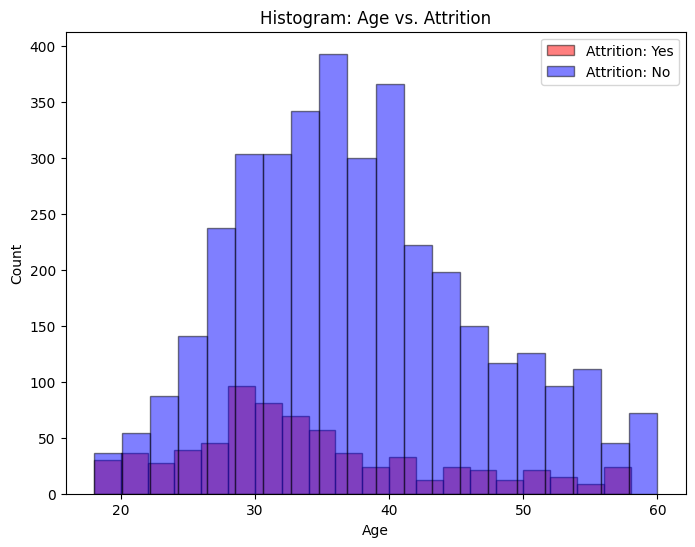

In [ ]:
# Filter the DataFrame to separate employees with and without attrition
attrition_yes = final[final['Attrition'] == 'Yes']
attrition_no = final[final['Attrition'] == 'No']

# Create histograms for the Age column
plt.figure(figsize=(8, 6))
plt.hist(attrition_yes['Age'], bins=20, alpha=0.5, color='red', label='Attrition: Yes', edgecolor='black')
plt.hist(attrition_no['Age'], bins=20, alpha=0.5, color='blue', label='Attrition: No', edgecolor='black')

plt.title('Histogram: Age vs. Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

<ipython-input-104-fcb6731e748f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




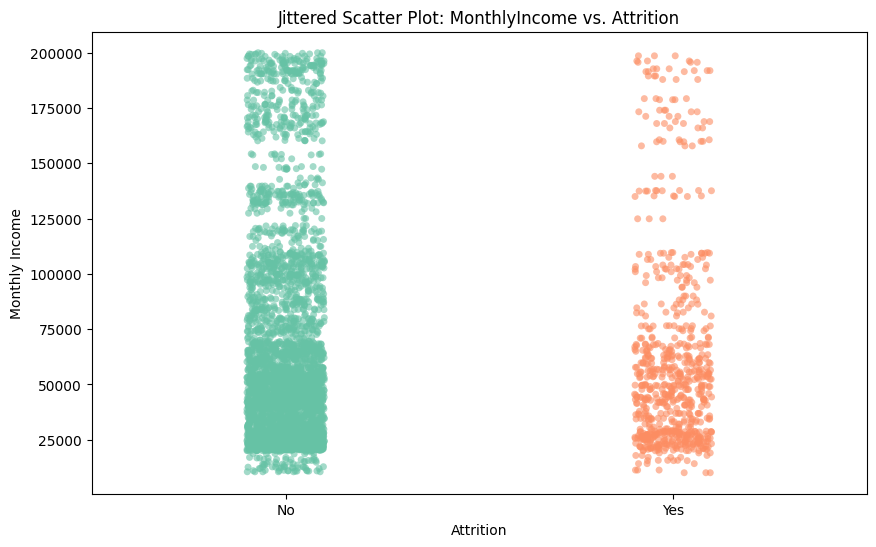

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jittered scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Attrition', y='MonthlyIncome', data=final, jitter=True, palette="Set2", alpha=0.6)

plt.title('Jittered Scatter Plot: MonthlyIncome vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

plt.show()

In [ ]:
# Create a pivot table to count the number of employees in each category
pivot_table = final.pivot_table(index='EducationField', columns='Attrition', aggfunc='size', fill_value=0)

# Create a new DataFrame with the hierarchical structure needed for the Sunburst chart
data = []
for education_field in pivot_table.index:
    attrition_counts = pivot_table.loc[education_field]
    data.append({'EducationField': education_field, 'Attrition': 'No', 'Count': attrition_counts['No']})
    data.append({'EducationField': education_field, 'Attrition': 'Yes', 'Count': attrition_counts['Yes']})

# Create the Sunburst chart
fig = px.sunburst(data, path=['EducationField', 'Attrition'], values='Count')

# Customize the chart appearance if needed
fig.update_layout(title='Attrition by Education Field Sunburst Chart')

# Show the chart
fig.show()


<Figure size 1000x600 with 0 Axes>

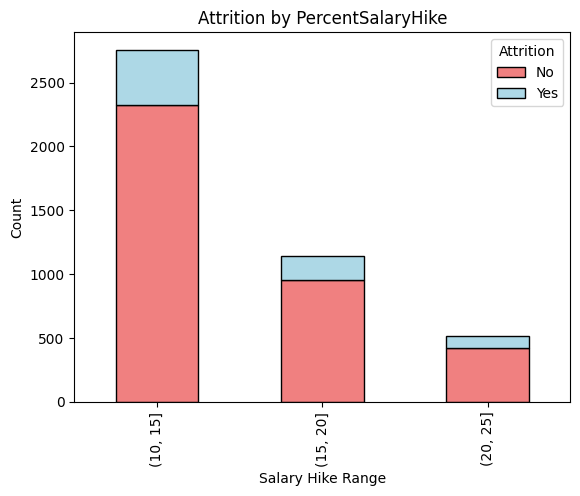

In [ ]:
# Define bins for grouping PercentSalaryHike values
bins = [10, 15, 20, 25]
# Create a new column that assigns each value of PercentSalaryHike to its corresponding bin
final['SalaryHikeGroup'] = pd.cut(final['PercentSalaryHike'], bins)
plt.figure(figsize=(10, 6))
cross_tab = final.groupby(['SalaryHikeGroup', 'Attrition']).size().unstack()
cross_tab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], edgecolor='black')

plt.title('Attrition by PercentSalaryHike')
plt.xlabel('Salary Hike Range')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()


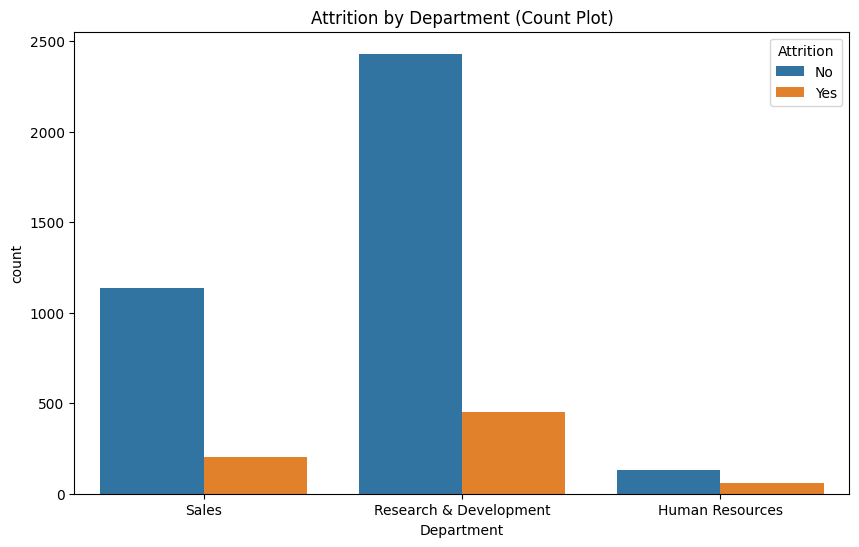

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=final)
plt.title('Attrition by Department (Count Plot)')
plt.show()


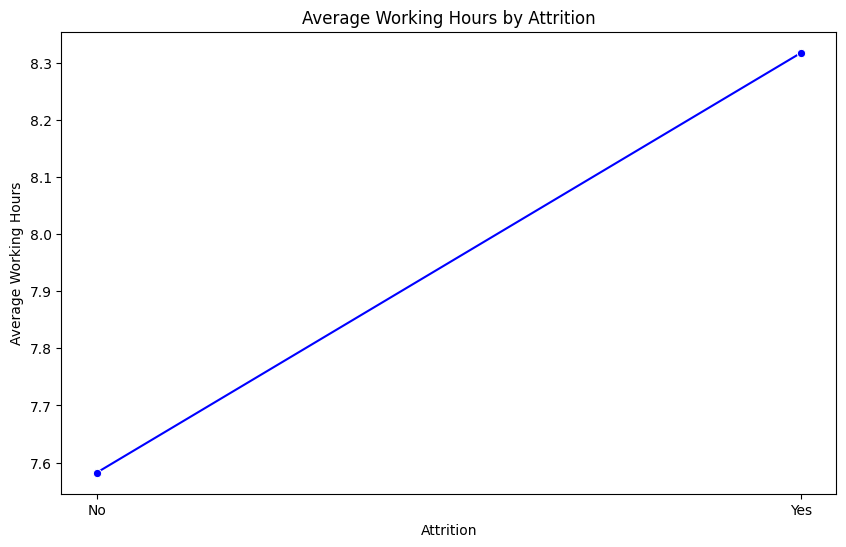

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Attrition' and calculate the average working hours
average_working_hours = final.groupby('Attrition')['Avg_Working_time'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Attrition', y='Avg_Working_time', data=average_working_hours, marker='o', color='blue')
plt.title('Average Working Hours by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Working Hours')
plt.show()


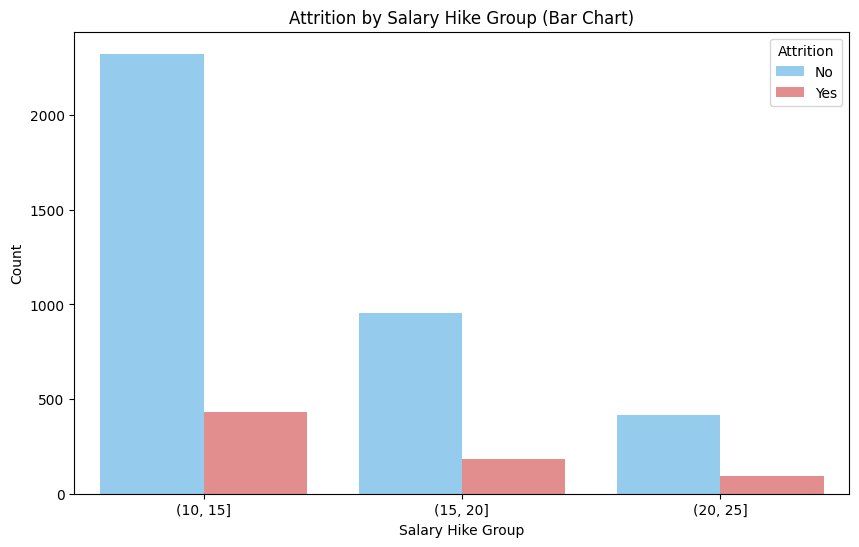

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='SalaryHikeGroup', hue='Attrition', data=final, palette=['lightskyblue', 'lightcoral'])
plt.title('Attrition by Salary Hike Group (Bar Chart)')
plt.xlabel('Salary Hike Group')
plt.ylabel('Count')
plt.show()


In [ ]:
data=final.drop(columns=["EmployeeCount","Over18","YearsWithCurrManager","EmployeeID","StandardHours"])

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,TotalSatisfaction,Avg_Working_time,SalaryHikeGroup
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,11,0,1.0,6,1,0,3.0,7.373651,"(10, 15]"
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0.0,23,1,6.0,3,5,1,3.0,7.718969,"(20, 25]"
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,1.0,15,3,5.0,2,5,0,2.2,7.013240,"(10, 15]"
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,3.0,11,3,13.0,5,8,7,3.2,7.193678,"(10, 15]"
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,4.0,12,2,9.0,2,6,0,2.8,8.006175,"(10, 15]"


In [ ]:
data.shape

(4410, 22)

In [ ]:
#Encoding categorical features

#BusinessTravel
data['BusinessTravel'] = data['BusinessTravel'].replace('Travel_Rarely',2)
data['BusinessTravel'] = data['BusinessTravel'].replace('Travel_Frequently',3)
data['BusinessTravel'] = data['BusinessTravel'].replace('Non-Travel',4)

#Attrition
data['Attrition'] = data['Attrition'].replace('Yes',1)
data['Attrition'] = data['Attrition'].replace('No',0)

#Gender
data['Gender'] = data['Gender'].replace('Male',1)
data['Gender'] = data['Gender'].replace('Female',0)

#MaritalStatus
data['MaritalStatus'] = data['MaritalStatus'].replace('Single',1)
data['MaritalStatus'] = data['MaritalStatus'].replace('Married',2)
data['MaritalStatus'] = data['MaritalStatus'].replace('Divorced',3)

#Department
data['Department'] = data['Department'].replace('Sales',1)
data['Department'] = data['Department'].replace('Human Resources',2)
data['Department'] = data['Department'].replace('Research & Development',3)

#EducationField
data['EducationField'] = data['EducationField'].replace('Life Sciences',1)
data['EducationField'] = data['EducationField'].replace('Medical',2)
data['EducationField'] = data['EducationField'].replace('Marketing',3)
data['EducationField'] = data['EducationField'].replace('Technical Degree',4)
data['EducationField'] = data['EducationField'].replace('Human Resources',5)
data['EducationField'] = data['EducationField'].replace('Other',0)

#JobRole
data['JobRole'] = data['JobRole'].replace('Sales Executive',1)
data['JobRole'] = data['JobRole'].replace('Manufacturing Director',2)
data['JobRole'] = data['JobRole'].replace('Healthcare Representative',3)
data['JobRole'] = data['JobRole'].replace('Manager',4)
data['JobRole'] = data['JobRole'].replace('Research Director',5)
data['JobRole'] = data['JobRole'].replace('Laboratory Technician',6)
data['JobRole'] = data['JobRole'].replace('Sales Representative',7)
data['JobRole'] = data['JobRole'].replace('Research Scientist',8)
data['JobRole'] = data['JobRole'].replace('Human Resources',9)



In [ ]:
data.drop(["SalaryHikeGroup"],axis=1,inplace=True)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,TotalSatisfaction,Avg_Working_time
0,51,0,2,1,6,2,1,0,1,3,...,131160,1.0,11,0,1.0,6,1,0,3.0,7.373651
1,31,1,3,3,10,1,1,0,1,8,...,41890,0.0,23,1,6.0,3,5,1,3.0,7.718969
2,32,0,3,3,17,4,0,1,4,1,...,193280,1.0,15,3,5.0,2,5,0,2.2,7.013240
3,38,0,4,3,2,5,1,1,3,9,...,83210,3.0,11,3,13.0,5,8,7,3.2,7.193678
4,32,0,2,3,10,1,2,1,1,1,...,23420,4.0,12,2,9.0,2,6,0,2.8,8.006175


<h5>CORRELATION</h5>

In [ ]:
correlation = data.drop(columns=['Attrition']).corrwith(data['Attrition'])
print(correlation)


Age                       -0.159205
BusinessTravel            -0.000074
Department                 0.001963
DistanceFromHome          -0.009730
Education                 -0.015111
EducationField             0.016454
Gender                     0.018125
JobLevel                  -0.010290
JobRole                    0.019491
MaritalStatus             -0.162070
MonthlyIncome             -0.031176
NumCompaniesWorked         0.041797
PercentSalaryHike          0.032533
StockOptionLevel          -0.006839
TotalWorkingYears         -0.170587
TrainingTimesLastYear     -0.049431
YearsAtCompany            -0.134392
YearsSinceLastPromotion   -0.033019
TotalSatisfaction         -0.143399
Avg_Working_time           0.201688
dtype: float64


## observations

In [ ]:
#The features department,gender,education field,numcompanies worked,percentsalaryhike,jobrole are positively correlated with attrition
# with gender,male have more attrition rate of 68%
# with Jobrole,research director and reseach scientist have high attrition rate
# in joblevel,level 2 is having high attrition rate
# singles have high attrition count when compared to marreied and divorced
# Who are travelling rarely in buisness trip have more attrition
# The agegroup from 25 to 35 have high attrition rate
# persons with low income have high attrition
# Those who are from life science and medical are highly leaving the job


<h5>The Management has to increase the monthly income and the percent of salary hike to decrease the attrition rate</h5>

# MODEL BUILDING

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
y = data['Attrition']
X = data.drop(columns=['Attrition'])

In [ ]:
#first we want to split the target and other features
from sklearn.model_selection import train_test_split

In [ ]:
x_train  , x_test , y_train, y_test = train_test_split (X ,y,test_size = 0.2 , random_state = 0)

In [ ]:
# we need to check whether the data is balanced or not
data["Attrition"].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

<h6>Since our data is imbalanced,we go with smote</h6>

## SMOTE

In [ ]:
!pip install scikit-learn

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cdd15b26440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [ ]:
# importing metrics to evluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn import metrics


In [ ]:
print(sklearn.__version__)

1.2.2


## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(max_iter=10000)
#Train the model
log_reg.fit(smote_train, smote_target)
#prediction
y_pred_lg = log_reg.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.6224489795918368


In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
#Evaluation Metrics
print('Classification Report:\n', classification_report(y_test, y_pred_lg))
cm = confusion_matrix(y_test, y_pred_lg)
print('Confusion Matrix:\n', cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.62      0.73       737
           1       0.25      0.63      0.36       145

    accuracy                           0.62       882
   macro avg       0.57      0.63      0.54       882
weighted avg       0.79      0.62      0.67       882

Confusion Matrix:
 [[457 280]
 [ 53  92]]


## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
#Train the data
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9965986394557823


In [ ]:
print(sklearn.__version__)


1.2.2


In [ ]:
print(classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      0.98      0.99       141

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

[[741   0]
 [  3 138]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Precision: 1.0
Recall: 0.9787234042553191
F1-Score: 0.989247311827957


##  Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5,random_state=0)
decision_tree.fit(smote_train, smote_target)

#prediction
y_pred = decision_tree.predict(x_test)
#metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


Accuracy: 0.7426303854875284
Confusion Matrix:
[[558 183]
 [ 44  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       741
           1       0.35      0.69      0.46       141

    accuracy                           0.74       882
   macro avg       0.64      0.72      0.65       882
weighted avg       0.83      0.74      0.77       882

Precision: 0.3464285714285714
Recall: 0.6879432624113475
F1-Score: 0.4608076009501187


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(smote_train, smote_target)

# Make predictions on the test data
knn_predictions = knn_model.predict(x_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, knn_predictions)
confusion = confusion_matrix(y_test, knn_predictions)
classification_report_str = classification_report(y_test, knn_predictions)

print("K-Nearest Neighbors (KNN) Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


K-Nearest Neighbors (KNN) Model Metrics:
Accuracy: 0.89
Confusion Matrix:
[[653  88]
 [ 11 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       741
           1       0.60      0.92      0.72       141

    accuracy                           0.89       882
   macro avg       0.79      0.90      0.83       882
weighted avg       0.92      0.89      0.90       882



<h3>In Random Forest Model we have accuracy of 98%,so we go with that model.</h3>

## PICKLING

In [ ]:
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))

In [ ]:
with open('modelrfc.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [ ]:
with open('/content/modelrfc.pkl', 'rb') as file:
                loaded_model = pickle.load(file)

In [ ]:
new_sample = np.array([[51, 2, 1, 6,2,1,0,1,3,2,131160,1.0,11,0,1.0,6,1,0,3.0,7.373651]])
#new_sample1 = scaler.transform(new_sample)
new_pred =rfc.predict (new_sample)
print('Attrition:', np.exp(new_pred))

Attrition: [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

